In [105]:
%matplotlib inline
import sys
sys.path.append('/usr/local/lib/python3.6/site-packages')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import time
import matplotlib.dates as md
from scipy import fftpack

# Second Based Dataset

In [140]:
df_nov20_1s = pd.read_csv("/Users/Xinyue/Downloads/h5_test/seb_data/nov20_data/seb_1s_class_t_nov20.csv",
                 names = ['1W-2_12','1W-2_03','1W-2_15','Timestamp','Label'],
                 dtype = {'Label': np.int, 'Timestamp': np.int},
                )
df_nov20_1s['Timestamp'] = pd.to_datetime(df_nov20_1s['Timestamp'],unit='s')
df_nov20_1s[0:5]

,1W-2_12,1W-2_03,1W-2_15,Timestamp,Label
0,0.000295,0.001028,0.000767,2017-11-20 00:12:33,0
1,0.000193,0.000861,0.000821,2017-11-20 00:12:34,0
2,0.000256,0.000913,0.000788,2017-11-20 00:12:35,0
3,0.000203,0.000893,0.000811,2017-11-20 00:12:36,0
4,0.000201,0.000815,0.000733,2017-11-20 00:12:37,0


In [170]:
df_nov20_1s.shape

(86400, 5)

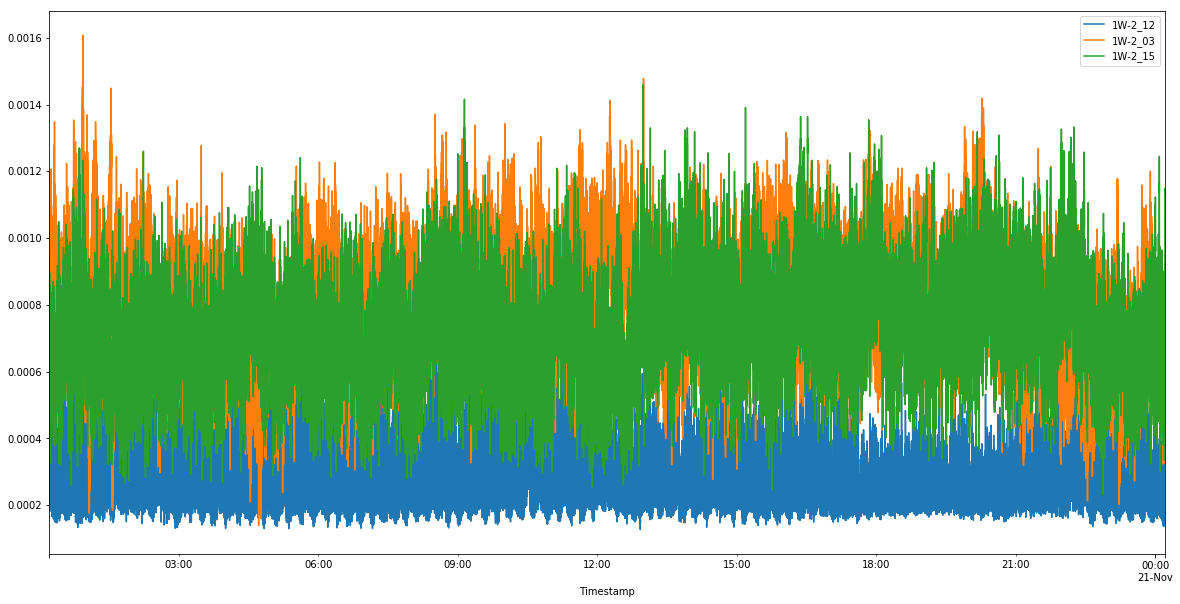

In [184]:
df_nov20_1s.plot(x='Timestamp',  y = ['1W-2_12','1W-2_03','1W-2_15'], figsize=(20,10))

# Minute Based Dataset

In [132]:
df_nov20_1m = pd.read_csv("/Users/Xinyue/Downloads/h5_test/seb_data/nov20_data/seb_1min_class_t_nov20.csv",
                 names = ['1W-2_12','1W-2_03','1W-2_15','Timestamp','Label'],
                 dtype = {'Label': np.int, 'Timestamp': np.int},
                )
df_nov20_1m['Timestamp'] = pd.to_datetime(df_nov20_1m['Timestamp'],unit='s')

In [171]:
# select Nov.20 data
df_nov20_1m[0:5]

,1W-2_12,1W-2_03,1W-2_15,Timestamp,Label
0,0.000280,0.000908,0.000729,2017-11-20 00:12:33,0
1,0.000325,0.000931,0.000588,2017-11-20 00:13:33,0
2,0.000384,0.000909,0.000681,2017-11-20 00:14:33,0
3,0.000312,0.000827,0.000602,2017-11-20 00:15:33,0
4,0.000315,0.000821,0.000559,2017-11-20 00:16:33,0


In [169]:
df_nov20_1m.shape

(1440, 5)

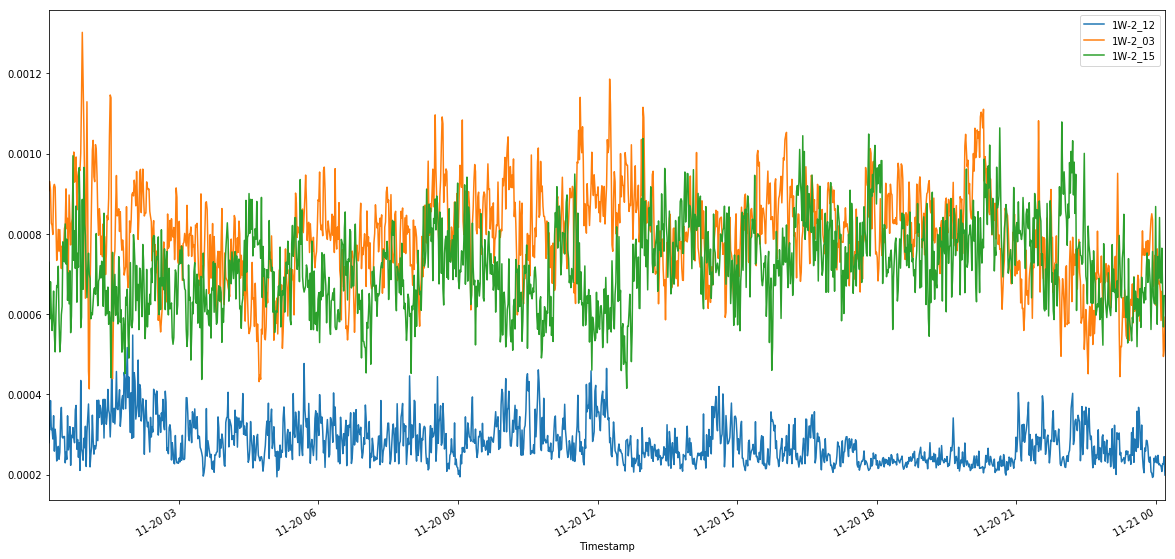

In [185]:
df_nov20_1m.plot(x='Timestamp', y= ['1W-2_12','1W-2_03','1W-2_15'], figsize=(20,10))

# Second Based Baseline Dataset

In [186]:
df_base_1s = pd.read_csv("/Users/Xinyue/Downloads/h5_test/seb_data/baseline-data/seb_1s_baseline.csv",
                 names = ['1W-2_12','1W-2_03','1W-2_15','Timestamp','Label'],
                 dtype = {'Label': np.int, 'Timestamp': np.int},
                )
df_base_1s['Timestamp'] = pd.to_datetime(df_base_1s['Timestamp'],unit='s')

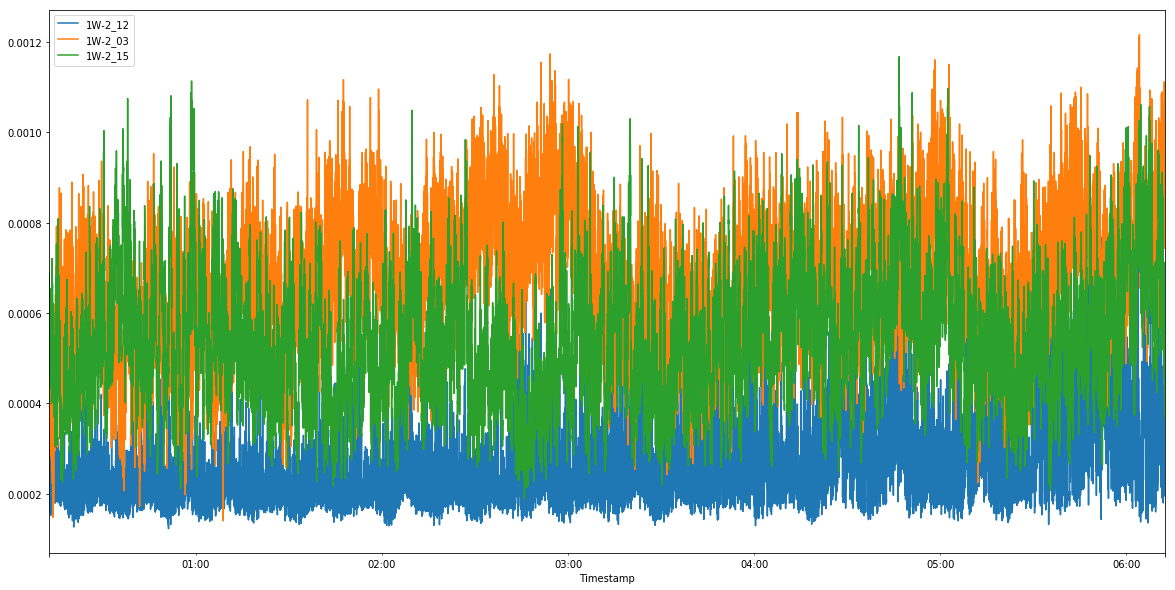

In [187]:
df_base_1s.plot(x='Timestamp', y= ['1W-2_12','1W-2_03','1W-2_15'], figsize=(20,10))

# Minute Based Baseline Dataset

In [188]:
df_base_1m = pd.read_csv("/Users/Xinyue/Downloads/h5_test/seb_data/baseline-data/seb_1min_baseline.csv",
                 names = ['1W-2_12','1W-2_03','1W-2_15','Timestamp','Label'],
                 dtype = {'Label': np.int, 'Timestamp': np.int},
                )
df_base_1m['Timestamp'] = pd.to_datetime(df_base_1m['Timestamp'],unit='s')

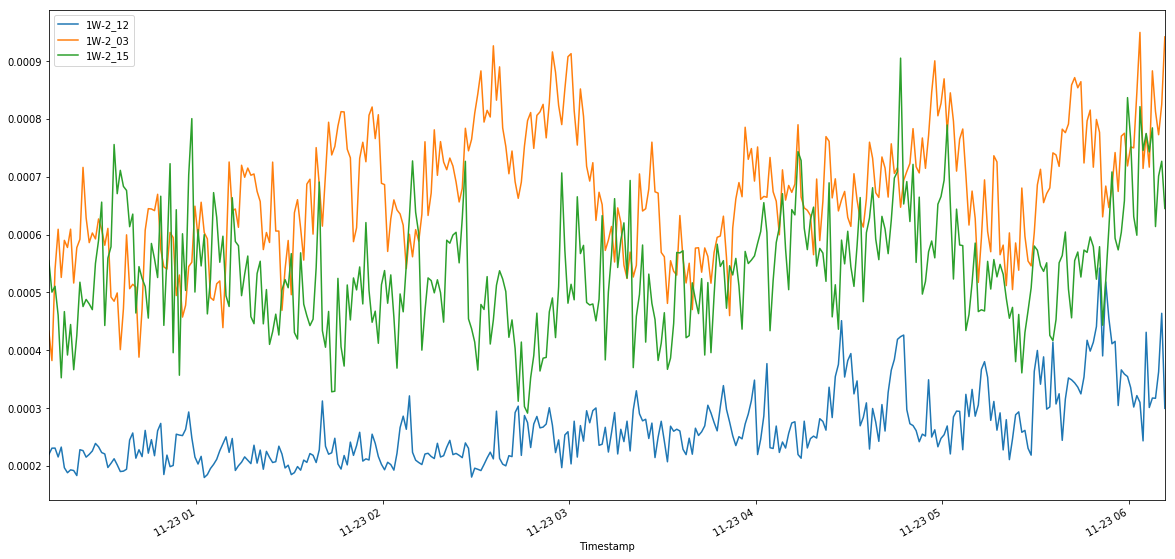

In [189]:
df_base_1m.plot(x='Timestamp', y= ['1W-2_12','1W-2_03','1W-2_15'], figsize=(20,10))

array([  4.59658691e+02,   1.38057938e+02,   6.75157471e+01,
         4.48281975e+01,   3.35738106e+01,   2.68418045e+01,
         2.23605957e+01,   1.91625080e+01,   1.67652740e+01,
         1.49014559e+01,   1.34108086e+01,   1.21914482e+01,
         1.11754894e+01,   1.03159494e+01,   9.57929516e+00,
         8.94092941e+00,   8.38241768e+00,   7.88966036e+00,
         7.45169497e+00,   7.05986309e+00,   6.70725012e+00,
         6.38824415e+00,   6.09826517e+00,   5.83352280e+00,
         5.59086752e+00,   5.36764383e+00,   5.16161251e+00,
         4.97085714e+00,   4.79374981e+00,   4.62886906e+00,
         4.47499561e+00,   4.33106899e+00,   4.19614935e+00,
         4.06942272e+00,   3.95016408e+00,   3.83773184e+00,
         3.73155975e+00,   3.63113856e+00,   3.53601527e+00,
         3.44578123e+00,   3.36007261e+00,   3.27855372e+00,
         3.20092678e+00,   3.12692118e+00,   3.05629206e+00,
         2.98881102e+00,   2.92427278e+00,   2.86248994e+00,
         2.80329251e+00,

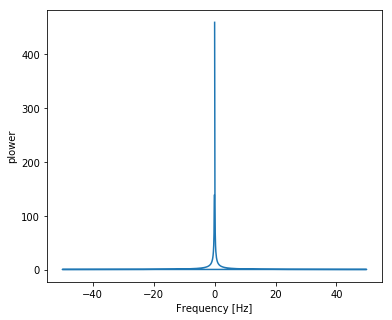

In [154]:
a1 = np.linspace(0, 10, 1000, dtype=np.float32)
b1 = np.sin(0.1*a1)
sig_fft = fftpack.fft(b1)
power = np.abs(sig_fft)
sample_freq = fftpack.fftfreq(b1.size, d = 0.01)
plt.figure(figsize=(6, 5))
plt.plot(sample_freq, power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('plower')
plt.show
power

[]

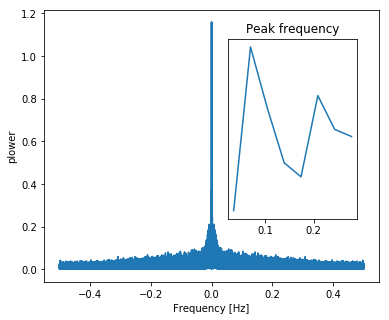

In [159]:
new_df = df_nov20_1s['1W-2_12']-np.mean(df_nov20_1s['1W-2_12'])
sig_fft = fftpack.fft(new_df)
power = np.abs(sig_fft)
sample_freq = fftpack.fftfreq(new_df.size, d = 1)
plt.figure(figsize=(6, 5))
plt.plot(sample_freq, power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('plower')
plt.show

axes = plt.axes([0.55, 0.3, 0.3, 0.5])
plt.title('Peak frequency')
plt.plot(freqs[:8], power[:8])
plt.setp(axes, yticks=[])


/Users/Xinyue/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


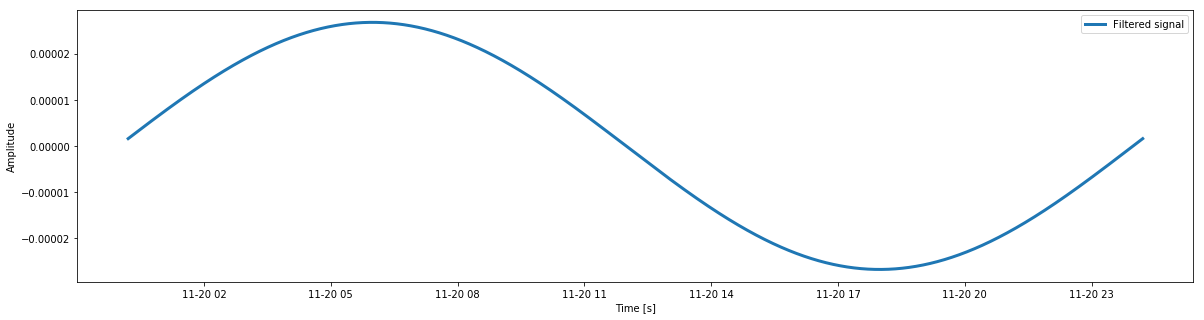

In [167]:
pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]
peak_freq = freqs[power[pos_mask].argmax()]

high_freq_fft = sig_fft.copy()
high_freq_fft[np.abs(sample_freq) > peak_freq] = 0
filtered_sig = fftpack.ifft(high_freq_fft)

plt.figure(figsize=(20, 5))
plt.plot( df_nov20_1s['Timestamp'],filtered_sig, linewidth=3, label='Filtered signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.legend(loc='best')

/Users/Xinyue/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<function matplotlib.pyplot.show>

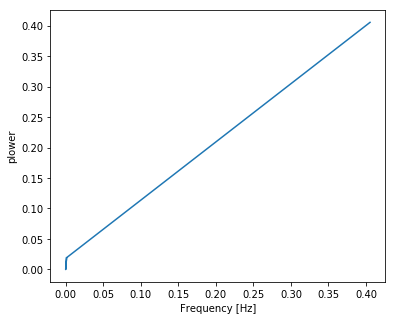

In [118]:
# Find the peak frequency: we can focus on only the positive frequencies
pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]
peak_freq = freqs[power[pos_mask].argmax()]
high_freq_fft = sig_fft.copy()
high_freq_fft[np.abs(sample_freq) > peak_freq] = 0
filtered_sig = fftpack.ifft(high_freq_fft)

filtered_sig_fft = fftpack.fft(filtered_sig)
power = np.abs(filtered_sig_fft)
sample_freq = fftpack.fftfreq(filtered_sig_fft.size, d=0.02)
plt.figure(figsize=(6, 5))
plt.plot(filtered_sig_fft, power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('plower')
plt.show